**After this laboratory you should be able to**
- Define graphs
- Explain **degrees + average degree**. Know how to plot the distribution of nodes (histogram).
- Explain the **clustering coefficient**.
- Form an intuition about **node centralities**

In [45]:
import networkx as nx
import numpy as np
import scipy
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt

import os

http://networksciencebook.com/chapter/2#networks-graphs

**Statistics review**
- https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf

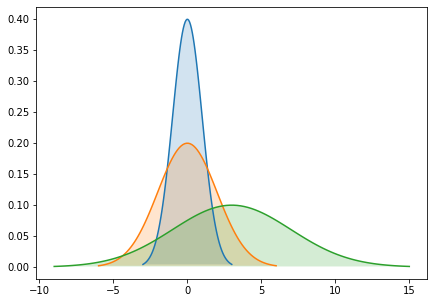

In [38]:
plt.figure(figsize = (7, 5))

mus = [0, 0, 3]
stds = [1, 2, 4]
for mu, std in zip(mus, stds):
    x = np.linspace(mu - 3*std, mu + 3*std, 100) # Get 100 equally spaced values between [mu - 3*std, mu + 3*std]
    y = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, y) # Plot lines
    plt.fill(x, y, alpha = .2) # Fill plots
    
plt.show()

In [2]:
X = np.array(
    [[1, 2, 3],
    [4, 5, 6]],
)

print(np.mean(X))
print(np.mean(X, axis = 0)) # Mean over cols
print(np.mean(X, axis = 1)) # Mean over rows
print()
print(np.std(X))
print(np.std(X, axis = 0)) # std over cols
print(np.std(X, axis = 1)) # std over rows

print()
print(np.var(X))
print(np.var(X, axis=0))
print(np.var(X, axis=1))

3.5
[2.5 3.5 4.5]
[2. 5.]

1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]

2.9166666666666665
[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [3]:
np.var(X) == np.std(X) ** 2

True

In [4]:
# Variance with formula

print(np.sum((X - np.mean(X, axis = 0))**2, axis = 0) / len(X))
print(np.sum((X.T - np.mean(X, axis = 1))**2, axis = 0) / len(X[0]))

[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [5]:
np.cov(X)

array([[1., 1.],
       [1., 1.]])

# Graphs

**Graph**  
    $G = (V,E)$  
    $V$ = graph components: nodes, vertices $u \in V$  
    $E$ = graph interactions: links, edges
    
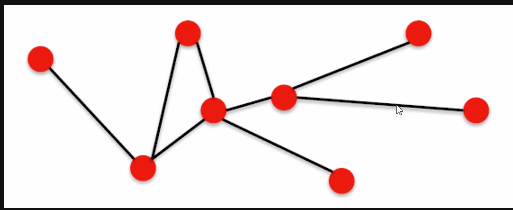

In [46]:
# https://networkrepository.com/power.php
G_pgrid = nx.from_scipy_sparse_matrix(mmread(os.path.join('..', 'data', 'power-US-Grid.mtx'))) 
# https://snap.stanford.edu/data/ca-GrQc.html or https://networkrepository.com/ca-GrQc.php
G_arvix = nx.read_edgelist(os.path.join('..', 'data', 'collaboration_network_of_arxiv_general_relativity_category.txt')) 
# http://snap.stanford.edu/data/ego-Facebook.html
G_fb = nx.read_edgelist(os.path.join('..', 'data', 'facebook_combined.txt'))
# http://snap.stanford.edu/data/wiki-Vote.html
G_wiki = nx.read_edgelist(os.path.join('..', 'data', 'wiki_vote.txt'))

#
G_cora = nx.readwrite.graphml.read_graphml(os.path.join('..', 'data', 'cora.graphml'))

# Degrees

**Degree -- Definition**  
Number of links connected to the node $k_i$

**Average node degree -- Def**  
Sum the degrees and divide by the number of nodes


$$\langle k \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i$$

In undirected graphs 
- $\langle k \rangle \equiv \dfrac {2E} N$

Directed graphs
- $\langle k^{in} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{in} = \dfrac E N$
- $\langle k^{out} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{out}$

$\langle k \rangle \equiv \dfrac {E} N$

### Node degree distribution
Let 
- $N_k =$ number of nodes with degree $k$
- $P(k)$ = probability that a randomly chosen node has degree $k$

> Then $P(k) = \dfrac {N_k} N$

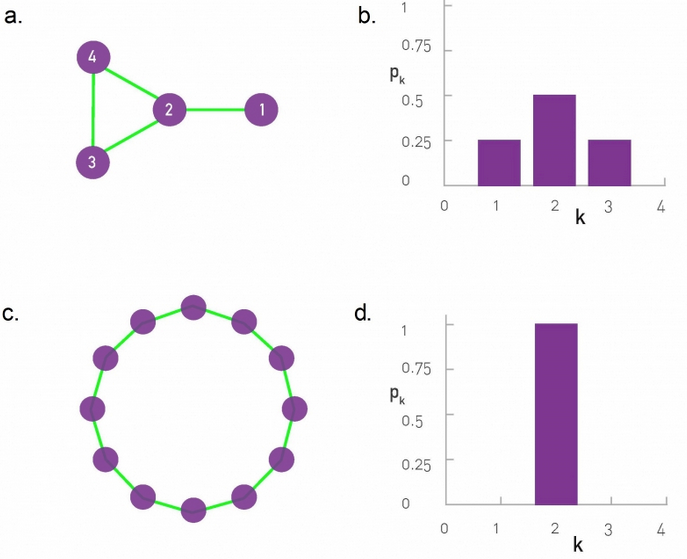

In [138]:
def average_degree(G):
    return sum(G.degree(n) for n in G.nodes) / len(G.nodes)
def average_in(G):
    return sum(G.in_degree(n) for n in G.nodes) / len(G.nodes)
def average_out(G):
    return sum(G.out_degree(n) for n in G.nodes) / len(G.nodes)

In [134]:
print(average_degree(G_pgrid))
print(average_degree(G_arvix))
print(average_degree(G_fb))
print(average_degree(G_wiki))
print(average_degree(G_cora))

2.66909532483303
5.530713468141931
43.69101262688784
28.32382290934645
4.0796780684104625


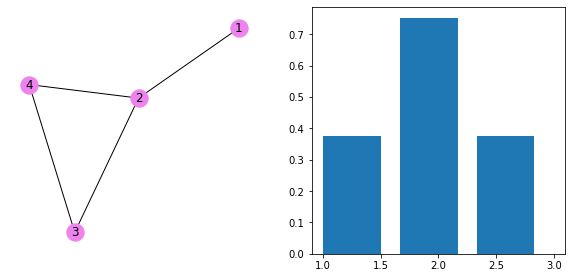

In [49]:
G = nx.cycle_graph(12)
G = nx.Graph([(1,2), (2, 4), (2, 3), (3, 4)])

plt.figure(figsize = (10, 10))
# Plot graph
plt.subplot(2, 2, 1)
nx.draw_kamada_kawai(G, with_labels=True, node_color = 'violet')

# Plot hist
plt.subplot(2, 2, 2)
plt.hist([G.degree(n) for n in G.nodes], density=True, bins = 3, width = .5)
plt.show()

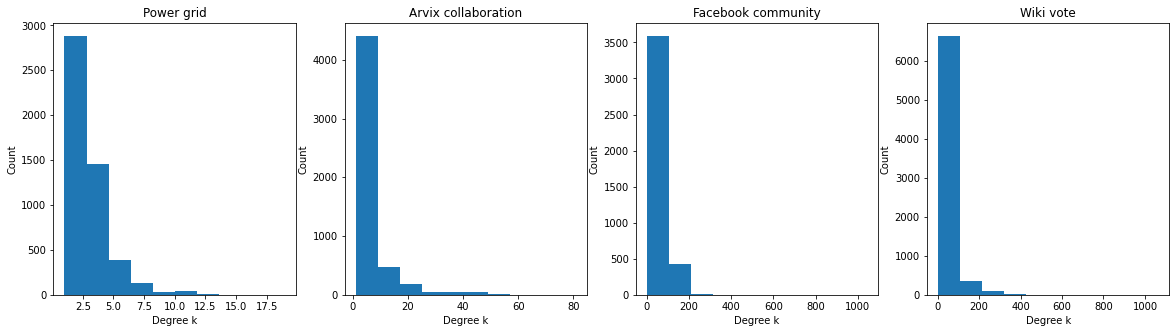

In [50]:
plt.figure(figsize = (4 * 5, 5))
real_graphs = [G_pgrid, G_arvix, G_fb, G_wiki]
titles = ['Power grid', 'Arvix collaboration', 'Facebook community', 'Wiki vote']


for i, (G, title) in enumerate(zip(real_graphs, titles)):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.hist([G.degree(u)  for u in G.nodes])
    plt.xlabel("Degree k")
    plt.ylabel("Count")
plt.show()


Maximum umber of edges $$E_{max} = \dfrac {N(N-1)} 2$$


True


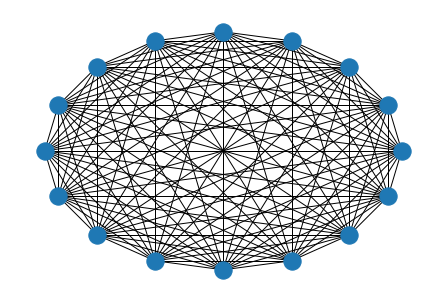

In [7]:
G = nx.complete_graph(16)
nx.draw_circular(G)

print(len(G.edges) == len(G.nodes) * (len(G.nodes) - 1) / 2)

# 3. Connectedness

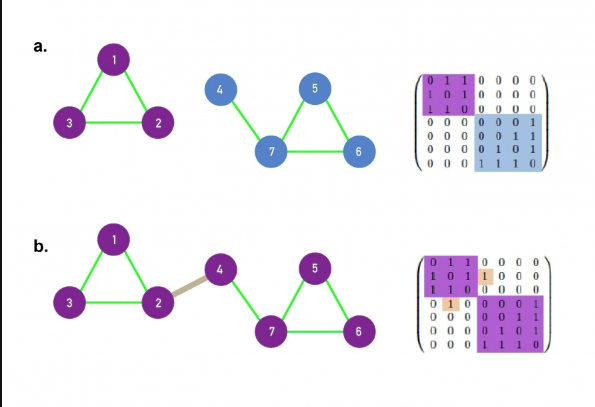

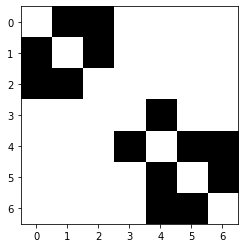

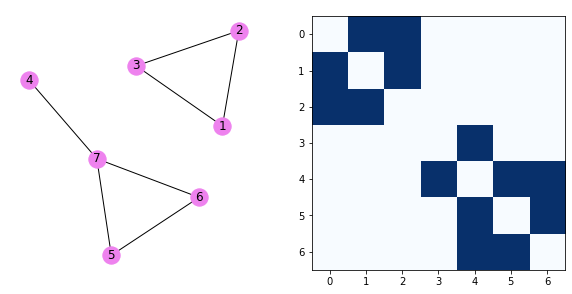

In [23]:
G = nx.Graph([(1, 2), (2, 3), (3, 1), (4, 7), (5, 7), (5, 6), (6, 7)])
A = nx.adjacency_matrix(G).todense()
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(G, with_labels = True, node_color='violet')
plt.subplot(1, 2, 2)
plt.imshow(A, cmap = 'Blues')
plt.show()

In [229]:
print(nx.is_connected(G))
print(list(nx.connected_components(G)))

Gs0 = G.subgraph(list(nx.connected_components(G))[0])
Gs1 = G.subgraph(list(nx.connected_components(G))[1])

print(Gs0.nodes, Gs1.nodes)

False
[{1, 2, 3}, {4, 5, 6, 7}]
[1, 2, 3] [4, 7, 5, 6]


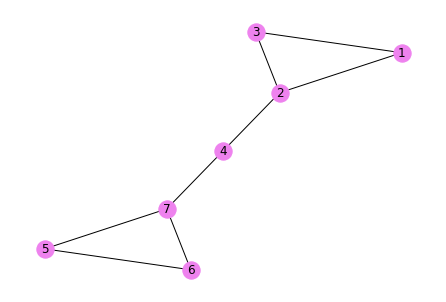

In [24]:
G.add_edge(4, 2)
nx.draw_kamada_kawai(G, with_labels=True, node_color='violet')

In [231]:
list(nx.bridges(G))

[(2, 4), (4, 7)]

# 4. Clustering coeffs

**What fraction of your neighbours are connected?**
$$C_i = \dfrac {\text{Number of connections between neighbors of } i} {\text{Max num of possible connections between neighbours of } i} = \dfrac {2E_i} {k_i(k_i-1)}$$
$C \in [0, 1]$

*Intuition*
- *Friend of a friend is my friend* -- Friend triangles
- Out of all the posible edges that connect the neighbours of $i$, how many exist?
- $C_i = 0 \to$ none of the neighbours of $i$ link to each other
- $C_i = 1 \to$ all of the neighbours of $i$ link to each other => complete graph
- $C_i = p \to$ neighbours of $i$ link to each other with a probability of $p$

In [261]:
G1.neighbors(0)

In [264]:
G1.has_edge(0, 1)

True

In [51]:
def clustering_coef(G: nx.Graph, u: int):
    """
    Return the clustering coefficient of node `u` from graph `G`
    Args:
        G: nx.Graph
            Input graph
        u: int
            Node to calculate the clustering coefficient of.
    
    Returns:
        clustering coeff :int 
    
    """
    ei = 0
    for i in G.neighbors(u): # For each neighbour `i` of `u`
        for j in G.neighbors(u): # For each neighbour `j` of `u`
            if i != j: # no self loops
                ei +=  G.has_edge(i, j) # Check if it has edge and add it to the total edges
    return ei / (G.degree(u) * (G.degree(u) - 1)) # divide by 2 because we count the edges twice
            

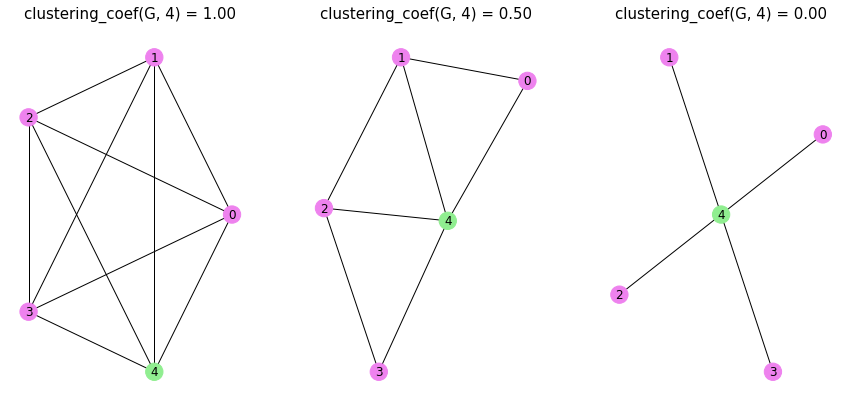

In [55]:
plt.figure(figsize = (15, 7))

G1 = nx.complete_graph(5)
G2 = nx.Graph([(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (2 ,4), (3, 4)])
G3 = nx.Graph([(0, 4), (1, 4), (2 ,4), (3, 4)])
graphs = [G1, G2, G3]

for i, G in enumerate(graphs):
    plt.subplot(1, 3, i+1)
    plt.title(f"{clustering_coef(G, 4) = :.2f}", size = 15)
    node_color = ['violet' if u != 4 else 'lightgreen' for u in G.nodes]
    nx.draw_kamada_kawai(G, with_labels=True, node_color=node_color)
    


In [56]:
clustering_coef(G1, 4), clustering_coef(G2, 4), clustering_coef(G3, 4)

(1.0, 0.5, 0.0)

In [59]:
nx.clustering(G2) # Clustering coeff for each node

{0: 1.0, 1: 0.6666666666666666, 4: 0.5, 2: 0.6666666666666666, 3: 1.0}

In [60]:
nx.clustering(G1)[4], nx.clustering(G2)[4], nx.clustering(G3)[4] # Compare with the networkx function

(1.0, 0.5, 0)

# 5. Centralities

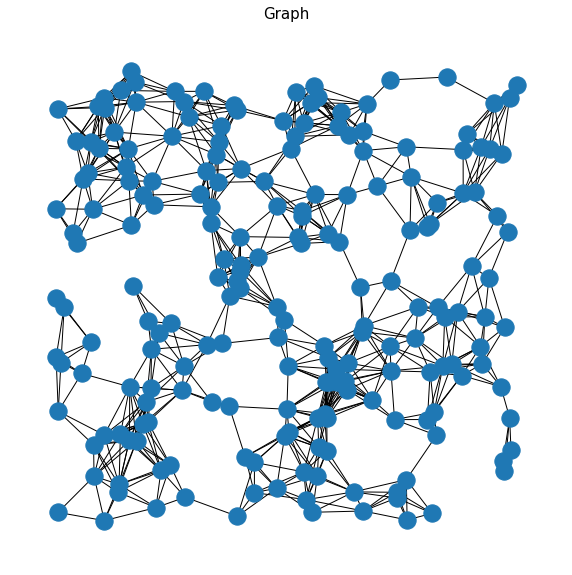

In [64]:
G = nx.random_geometric_graph(200, 0.125, seed=896803)
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize = (10, 10))
plt.title("Graph", size = 15)
nx.draw(G, pos = pos)

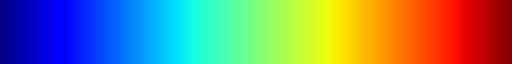

In [65]:
plt.cm.jet

In [66]:
deg_colors = list(G.degree(n) for n in G.nodes)

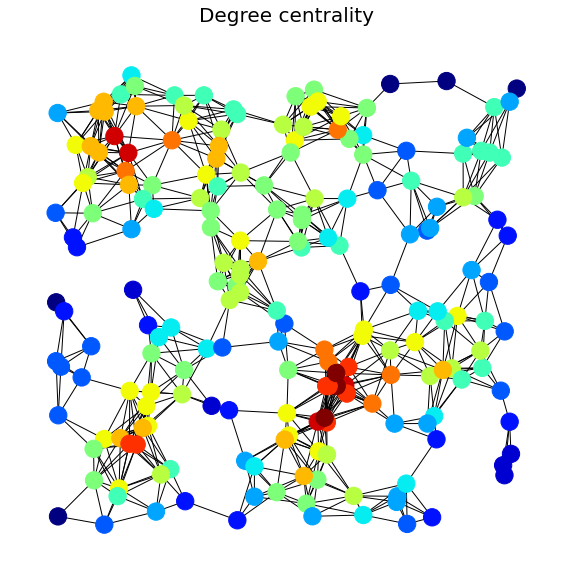

In [68]:
deg_colors = list(G.degree(n) for n in G.nodes)

plt.figure(figsize = (10, 10))
plt.title("Degree centrality", size = 20)
nx.draw(G, pos = pos, node_color = deg_colors, cmap = plt.cm.jet)


**Node betweenness**  
Bridging capability of a node

$Btw(n_i) = \sum_{i\neq j\neq k \in G} \dfrac {\sigma_{ij}(n_i)} {\sigma_{ij}}$

Where

- $σ_{ij}$ is the total number of shortest paths from node $i$ to node $j$
- $\sigma_{ij}(n_i)$ is the number of those paths that pass through $n_i$

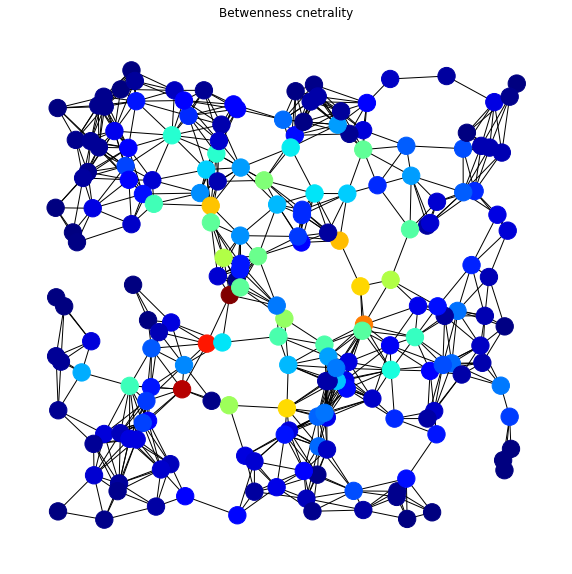

In [330]:
btw_colors = list(nx.betweenness_centrality(G).values())

plt.figure(figsize = (10, 10))
plt.title("Betwenness cnetrality")
nx.draw(G, pos = pos, node_color = btw_colors, cmap = plt.cm.jet)

**Closeness**  
Closer to the center of the network = shortest path to everyone else

$C(x) = \dfrac 1 {\sum_y d(y,x)}$

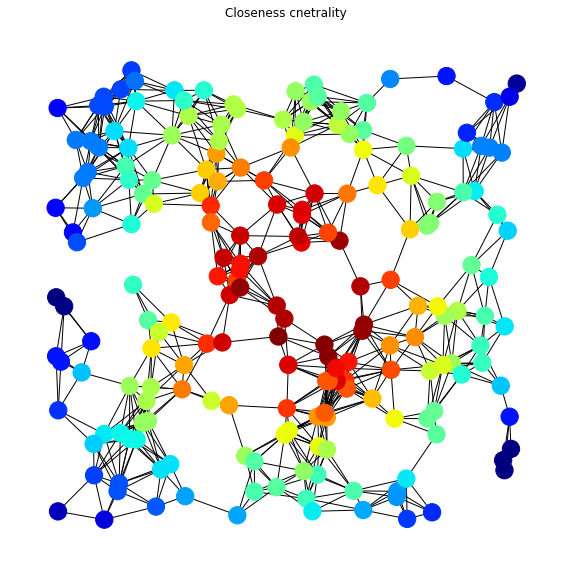

In [329]:
btw_colors = list(nx.closeness_centrality(G).values())

plt.figure(figsize = (10, 10))
plt.title("Closeness cnetrality")
nx.draw(G, pos = pos, node_color = btw_colors, cmap = plt.cm.jet)

# Matrix representations


## Adjacency matrix
- [wiki entry](https://en.wikipedia.org/wiki/Adjacency_matrix)

The **adjacency matrix** is a $N \times N$ matrix that has ones  where a links between 2 nodes exists and zeros in rest. We usually denote it with $A$

**Properties**
- $A^k$ reveals the number of $k$-step paths between nodes. $A^k_{uv} = a$ means there are $a$ paths of length $k$ between nodes $u,v$
- For an undirected network the matrix is symmetric
- For a weighted graph the matrix has the weights of the edges instead of ones
- The sum over a column represents the in-degree of a node. The sum over a row represents the out-degree of a node

**Remark**
- Real networks are usually sparse(full of zeroes) so a full matrix representation is space-inneficient. Therefore different matrix formats have been used -- CSR, COO

In [96]:
pos = nx.kamada_kawai_layout(G)

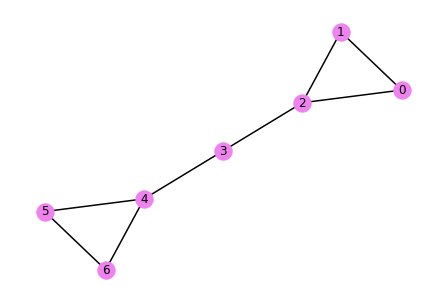

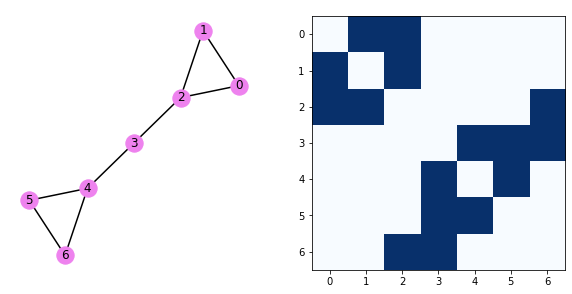

In [115]:
G = nx.barbell_graph(3, 1)
#G = nx.DiGraph([(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 2), (3, 6), (4, 6), (4, 5), (5, 4), (5, 6), (6, 4), (6, 5)])
A = nx.to_numpy_array(G)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_color = 'violet', width = 1.5, node_size = 300, with_labels = True)
plt.subplot(1, 2, 2)
plt.imshow(A, cmap = 'Blues')
plt.show()

In [116]:
#print(sum(A[0, :]) == G.in_degree(1))
#print(sum(A[:, 5]) == G.out_degree(5))

In [117]:
A_squared = np.linalg.matrix_power(A, 2)
print(A_squared)

[[2. 1. 1. 0. 0. 0. 1.]
 [1. 2. 1. 0. 0. 0. 1.]
 [1. 1. 3. 1. 0. 0. 0.]
 [0. 0. 1. 3. 1. 1. 0.]
 [0. 0. 0. 1. 2. 1. 1.]
 [0. 0. 0. 1. 1. 2. 1.]
 [1. 1. 0. 0. 1. 1. 2.]]


## Degree matrix
- [wiki](https://en.wikipedia.org/wiki/Degree_matrix)


The degree matrix is a **diagonal matrix** that has the degree of each node on the diagonal. We usually denote it with $D$.

**Reminder**
- The degree of each node represents the neighbourhood size (number of neighbours)
- If $D$ is diagonal then $D^n$ is just raising each element to the $n$th power

**Properties**
- The trace (diagonal sum) of a degree matrix is twice the number of edges

In [81]:
def degree_matrix(G):
    if isinstance(G, nx.DiGraph):
        return np.diag([G.out_degree(u) for u in G.nodes])
    else:
        return np.diag([G.degree(u) for u in G.nodes])

In [82]:
D = degree_matrix(G)
print(D)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [83]:
# Check property
print(np.trace(D) == 2 * G.number_of_edges()) # Without 2 for digraph

True


In [84]:
# Check reminder
print(np.all(np.linalg.matrix_power(D, 2) == D ** 2))

True


**Normalized adjacency matrix**  
We can use the degree matrix to transform the adjacency matrix into a **[stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix)** over rows -- $A_{avg} = D^{-1}A$. We call it a **normalized adjacency matrix**. Intuitively we divide each node by the number of neighbours.

[Sounds familiar?](https://setosa.io/ev/markov-chains/)

In [129]:
A_avg = np.linalg.inv(D) @ A
print(np.round(A_avg, 2))

[[0.   0.5  0.5  0.   0.   0.   0.  ]
 [0.5  0.   0.5  0.   0.   0.   0.  ]
 [0.33 0.33 0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.33 0.33 0.33]
 [0.   0.   0.   0.5  0.   0.5  0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.   0.  ]]


In [130]:
# After 1 step
print(np.round(np.linalg.matrix_power(A_avg, 2), 2))
print()
# Convergence
print(np.round(np.linalg.matrix_power(A_avg, 100), 2))

[[0.42 0.17 0.25 0.   0.   0.   0.17]
 [0.17 0.42 0.25 0.   0.   0.   0.17]
 [0.17 0.17 0.5  0.17 0.   0.   0.  ]
 [0.   0.   0.17 0.5  0.17 0.17 0.  ]
 [0.   0.   0.   0.25 0.42 0.17 0.17]
 [0.   0.   0.   0.25 0.17 0.42 0.17]
 [0.17 0.17 0.   0.   0.17 0.17 0.33]]

[[0.13 0.13 0.19 0.19 0.12 0.12 0.13]
 [0.13 0.13 0.19 0.19 0.12 0.12 0.13]
 [0.13 0.13 0.19 0.19 0.12 0.12 0.12]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.12]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.13]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.13]
 [0.13 0.13 0.19 0.19 0.13 0.13 0.13]]


**Symmetric normalized adjacency matrix**  
Intuitively we divide each node by the size of the neighbourhood and also by the size of our neighbourhood.

$$D^{-1/2}AD^{-1/2}$$

*Intuition*: https://math.stackexchange.com/questions/3035968/interpretation-of-symmetric-normalised-graph-adjacency-matrix

In [131]:
A_ = np.sqrt(np.linalg.inv(D)) @ A @ np.sqrt(np.linalg.inv(D))
print(np.round(A_, 2))

[[0.   0.5  0.41 0.   0.   0.   0.  ]
 [0.5  0.   0.41 0.   0.   0.   0.  ]
 [0.41 0.41 0.   0.   0.   0.   0.41]
 [0.   0.   0.   0.   0.41 0.41 0.41]
 [0.   0.   0.   0.41 0.   0.5  0.  ]
 [0.   0.   0.   0.41 0.5  0.   0.  ]
 [0.   0.   0.41 0.41 0.   0.   0.  ]]
